# Model Selection

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
titanic = pd.read_csv('titanic_dataset (1).csv')

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic.shape

(891, 12)

In [12]:
titanic.isna().sum() * 100 / titanic.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
for i in titanic.columns:
    print(f'Number of unique values in {i}: {titanic[i].nunique()}')

Number of unique values in PassengerId: 891
Number of unique values in Survived: 2
Number of unique values in Pclass: 3
Number of unique values in Name: 891
Number of unique values in Sex: 2
Number of unique values in Age: 88
Number of unique values in SibSp: 7
Number of unique values in Parch: 7
Number of unique values in Ticket: 681
Number of unique values in Fare: 248
Number of unique values in Cabin: 147
Number of unique values in Embarked: 3


In [14]:
## DETECTING OUTLIERS

<AxesSubplot:xlabel='Age'>

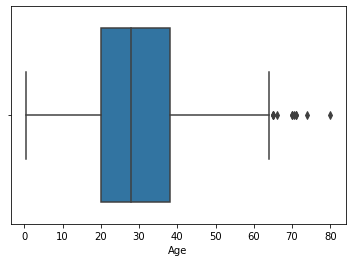

In [15]:
sns.boxplot(titanic['Age'])

<AxesSubplot:xlabel='SibSp'>

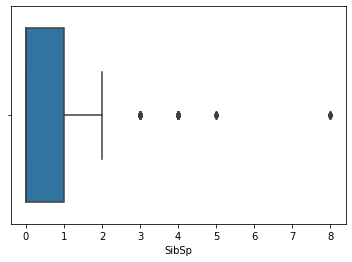

In [16]:
sns.boxplot(titanic['SibSp'])

In [17]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [18]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [19]:
titanic['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

<AxesSubplot:xlabel='Fare'>

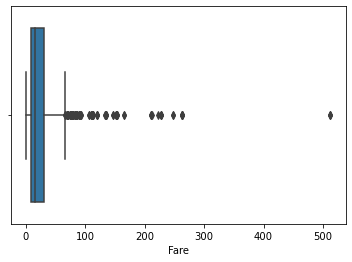

In [20]:
sns.boxplot(titanic['Fare'])

In [21]:
#droping rows in which Fare > 300
drop_index = titanic[titanic['Fare'] > 300].index
titanic.drop(drop_index, axis=0, inplace=True)

In [22]:
#ignoring unnecessary columns and columns with majority of missing values
titanic_df = titanic.iloc[:,[1,2,4,5,6,7,9,11]]

In [23]:
titanic_df.shape

(888, 8)

In [24]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [25]:
titanic_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.334068,-0.079472,-0.033395,0.082157,0.261742
Pclass,-0.334068,1.000000,-0.368625,0.080937,0.018212,-0.604960
Age,-0.079472,-0.368625,1.000000,-0.307639,-0.189194,0.100396
SibSp,-0.033395,0.080937,-0.307639,1.000000,0.415141,0.211816
Parch,0.082157,0.018212,-0.189194,0.415141,1.000000,0.263910
Fare,0.261742,-0.604960,0.100396,0.211816,0.263910,1.000000


In [26]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [30]:
cat_cols = ['Sex', 'Embarked']
num_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [31]:
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipe = Pipeline([
    ("num_imputer", SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler())
])
num_data_transformed = num_pipe.fit_transform(titanic_df[num_cols])

In [32]:

#pipeline for categorical data
from sklearn.preprocessing import OneHotEncoder

cat_pipe = Pipeline([
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])
cat_data_transformed = cat_pipe.fit_transform(titanic_df[cat_cols]).toarray()

In [33]:
#merging two pipeline
from sklearn.compose import ColumnTransformer

datapipe = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])
cols = num_cols + cat_cols
transformed_data = datapipe.fit_transform(titanic_df)

In [34]:
transformed_data

array([[ 8.24122683e-01, -5.89844758e-01,  4.30627490e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.57529024e+00,  6.39743832e-01,  4.30627490e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.24122683e-01, -2.82447610e-01, -4.75527039e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 8.24122683e-01,  2.73023513e-16,  4.30627490e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.57529024e+00, -2.82447610e-01, -4.75527039e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.24122683e-01,  1.78648111e-01, -4.75527039e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [35]:
X = transformed_data
y = titanic_df['Survived']

In [36]:
#splitting dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [38]:
#Hyper Parameter tuning using GridSearchCV and KFold cross validation
def get_best_params(X,y):
    models = {
        'knn': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': range(5,20,2)
            }
        },
        'svc': {
            'model': SVC(gamma='auto'),
            'params': {
                'kernel': ['linear', 'rbf'],
                'C': range(5,20,2)
            }
        }
    }
    scores = []
    for model_name, config in models.items():
        gd = GridSearchCV(estimator=config['model'], param_grid=config['params'], n_jobs=-1, cv=5)
        gd.fit(X,y)
        scores.append({'model': model_name, 'KFold_cv_score': gd.best_score_, 'best_params': gd.best_params_})
    return pd.DataFrame(scores)

In [39]:
scores = get_best_params(X,y)

In [41]:
scores

,model,KFold_cv_score,best_params
0,knn,0.806335,{'n_neighbors': 5}
1,svc,0.828845,"{'C': 5, 'kernel': 'rbf'}"


In [42]:
#StratifiedKFold
def get_stratified_accuracy(model, x, y):
    #convert ndarray to DataFrame for proper indexing
    x = pd.DataFrame(x)
    y = pd.DataFrame(y)
    
    stratified_accuracy = []
    stf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    for train_index, test_index in stf.split(x,y):
            X_train_fold, y_train_fold = x.iloc[train_index], y.iloc[train_index]
            X_test_fold, y_test_fold = x.iloc[test_index], y.iloc[test_index]
            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_test_fold)
            stratified_accuracy.append(accuracy_score(y_test_fold, y_pred))
    return stratified_accuracy

In [43]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
svm_clf = SVC(kernel='rbf', gamma=0.3, C=5)

knn_score = np.array(get_stratified_accuracy(knn_clf,X,y))
svc_score = np.array(get_stratified_accuracy(svm_clf,X,y))

print('StratifiedKFold CV score of KNeighborsClassifier model : ', knn_score.mean())
print('StratifiedKFold CV score of SVC model : ', svc_score.mean())


StratifiedKFold CV score of KNeighborsClassifier model :  0.8119532787405573
StratifiedKFold CV score of SVC model :  0.8266044562940392


In [ ]:
#Here we can see SVC modle performs slight better than KNeighbors model